## Sample Neural Network
Here's an example of building a simple neural network using Python and Pandas to classify images of handwritten digits from the MNIST dataset.

This example solves the problem of classifying images of handwritten digits from the MNIST dataset. The goal is to build a neural network that can accurately predict the digit shown in the input image. The problem is a classic machine learning problem and is often used as a benchmark for evaluating different algorithms and models. The example uses a simple neural network with two fully connected layers to achieve high accuracy in classifying the digits.

In [1]:
# uncomment the following lines to install the required packages
!pip install tensorflow
!pip install pandas
!pip install numpy

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the MNIST dataset, a dataset of handwritten digits
# The MNIST dataset is a dataset of 60,000 28x28 grayscale images of the 10 digits
# Data is split into a training set of 50,000 images and a test set of 10,000 images 
# The training and test data is structured as a 3-dimensional array of instance, image width and image height.
# X_train: is the image data, 50000 images, each element is 28x28 gray scale image
# y_train: is the label data, 50000 labels, each label corresponds to a handwritten digit
# X_test: is the image data, 10000 images, each element is 28x28 gray scale image 
# y_test: is the label data, 10000 labels, each label corresponds to a handwritten digit
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the input images
# Neural networks expect the input to be a 1D array of numbers
# X_train and X_test are reshaped to 1D array of 784 from 2D array of 28x28
X_train = X_train.reshape(X_train.shape[0], -1)  # X_train.shape[0]: 50000, -1: 784, 28x28
X_test = X_test.reshape(X_test.shape[0], -1) #`X_test.shape[0]: 10000, -1: 784, 28x28`

# Normalize the data
# X_train, X_test are normalized from and integer between 0-255 to a float32 between 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the target variable to one-hot encoded vectors
# For each label all elements are 0 except for the index of the number which is 1
# For example, 5 is converted to [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], starting from left counting 0,1,2,3,4,5 in this example
# y_train, y_test are converted to one-hot encoded vectors
# num_classes: 10, number of elements in the one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define a new Sequential model, for a Neural Network (NN)
# Sequential model, provide by Keras, is a linear stack of layers
# Each layer has exactly one input tensor and one output tensor, a tensor is a multi-dimensional array
# Dense is the regular densely-connected NN layer, each neuron is connected to every neuron in the previous layer
# ... 128: number of neurons in the layer, also called nodes or units; this is a hyperparameter and can be tuned for better performance or accuracy
# ... relu: rectified linear unit, a common choice in neural networks
# ... input_shape: shape of the input data, 
# ... 784: 28x28
# Dense layer with 10 neurons, one for each digit
# ... 10: number of output units
# ... softmax is activation function, it is used to convert the output to a probability distribution
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
# loss: loss function to minimize, categorical_crossentropy is a good default for classification
# optimizer: adam is the algorithm to used to minimize the loss function, it combines the advantages of two other extensions of stochastic gradient descent
# metrics: judge the performance of the model, accuracy is appropriate for classification problems 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model, for a number of epochs, in this case 10
# X_train, y_train: the training data and corresponding labels
# epochs: number of times the model will passed through the model
# batch_size: means to model will be trained on 32 images at a time
# validation_data: is used to monitor the test loss and accuracy during training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model, the test loss and accuracy
# X_test: test data, the images
# y_test: target data, the labels
# test_loss: scalar test loss, float between 0 and 1, close to 0 is good
# test_acc: scalar test accuracy, float between 0 and 1, close to 1 is good  
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0

/Users/jacobzierolf/nighthawk/jacob_2025/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8767 - loss: 0.4305 - val_accuracy: 0.9625 - val_loss: 0.1305
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9654 - loss: 0.1192 - val_accuracy: 0.9636 - val_loss: 0.1117
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.0805 - val_accuracy: 0.9746 - val_loss: 0.0824
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0574 - val_accuracy: 0.9753 - val_loss: 0.0830
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0449 - val_accuracy: 0.9751 - val_loss: 0.0775
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9903 - loss: 0.0329 - val_accuracy: 0.9772 - val_loss: 0.0738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9770 - val_loss: 0.0763
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.9938 - loss: 0.0226 - val_accur

## Visualize how this neural network works. 

Use the matplotlib library to display some of the input images and the corresponding predicted labels.  This code will create a 5x5 grid of subplots, each containing an input image from the test set and its predicted label. The np.argmax function is used to find the index of the predicted label with the highest probability.

  Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


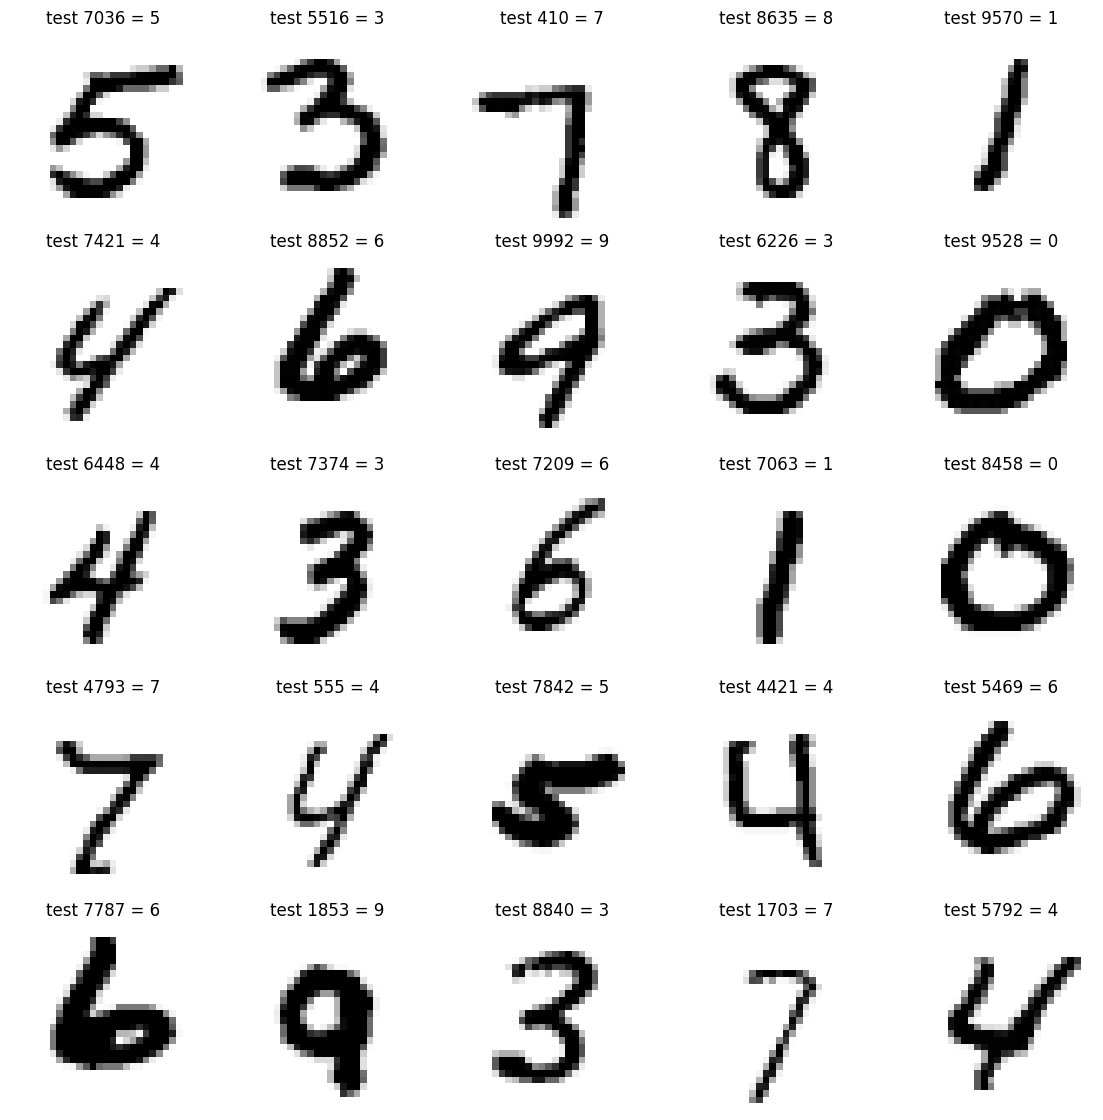

In [2]:
# This cell is dependent on the previous cell

# uncomment the following lines to install the required packages
!pip install matplotlib 

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate a random sample of 25 indices from the range 0 to 9999
indices = np.random.choice(range(10000), size=25, replace=False)

# Setup 25 images and their predicted labels prior to iteration
_, axs = plt.subplots(5, 5, figsize=(14, 14)) # setup 5x5 grid and scale figure
axs = axs.ravel() # convert to 1D array for easy iteration
for i in range(25):
    axs[i].set_title('test {} = {}'.format(indices[i],np.argmax(y_pred[indices[i]]))) # show test, predicted value
    axs[i].imshow(X_test[indices[i]].reshape(28, 28), cmap=plt.cm.gray_r) # show flattened 1D array as 2D array, 28x28
    axs[i].axis('off') # turn of axis

# Show occurs after the loop
plt.show()

# Resources
> Lesson to expand on MNIST.

TensorFlow's official MNIST tutorial: TensorFlow is a popular open-source machine learning framework, and their MNIST tutorial provides a great introduction to building neural networks with TensorFlow. You can find the tutorial here: https://www.tensorflow.org/tutorials/keras/classification.

Coursera's Deep Learning Specialization: This is a series of courses taught by Andrew Ng that provides a comprehensive introduction to deep learning. The second course in the series, "Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization," covers the MNIST example in detail. You can find the course here: https://www.coursera.org/specializations/deep-learning.

Neural Networks and Deep Learning book: This is a free online book by Michael Nielsen that provides an introduction to neural networks and deep learning. The book includes a chapter on the MNIST example, which provides a detailed explanation of how the neural network works. You can find the book here: http://neuralnetworksanddeeplearning.com/chap1.html.

Fast.ai: This is a set of online courses and resources that provide an introduction to deep learning. The courses include hands-on coding assignments, including an assignment on the MNIST example. You can find the courses here: https://www.fast.ai/.